/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


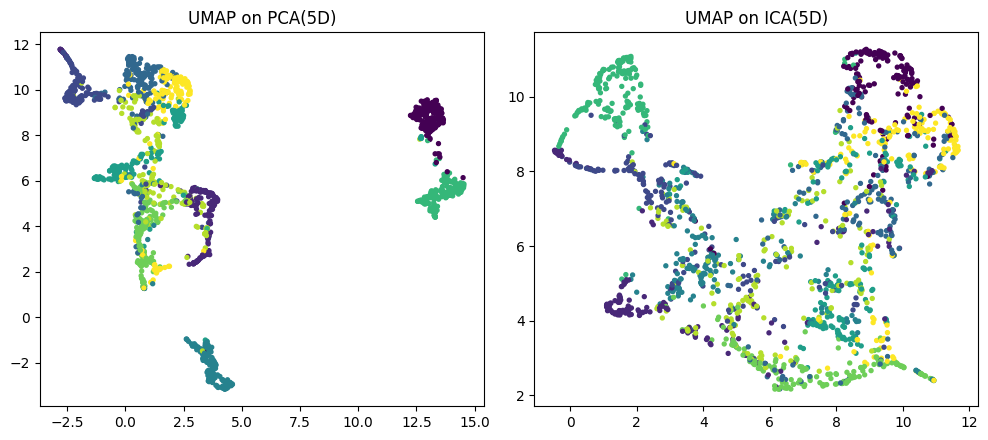

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
import umap

# ----- Example data (replace with your own X and optional y) -----
# X shape: (n_samples, n_features)
X, y = datasets.load_digits(return_X_y=True)  # demo only

random_state = 42
n_lin = 5      # target dims for PCA/ICA
n_out = 2      # UMAP output dims: 2D plot

# Linear reducers (to 5D)
pca5 = make_pipeline(StandardScaler(with_mean=True), PCA(n_components=n_lin, random_state=random_state))
ica5 = make_pipeline(StandardScaler(with_mean=True), FastICA(n_components=n_lin, random_state=random_state, max_iter=1000))

X_pca5 = pca5.fit_transform(X)
X_ica5 = ica5.fit_transform(X)

# UMAP from 5D → 2D
# Tips:
# - n_neighbors controls local vs global structure (higher ~ more global).
# - min_dist controls cluster tightness (lower → tighter clusters).
# - metric='cosine' often works well for embeddings/text; 'euclidean' is fine for many numeric sets.
umap_cfg = dict(n_neighbors=30, min_dist=0.05, n_components=n_out, metric='euclidean', random_state=random_state)

umap_pca = umap.UMAP(**umap_cfg).fit_transform(X_pca5)
umap_ica = umap.UMAP(**umap_cfg).fit_transform(X_ica5)

# ----- Plot -----
plt.figure(figsize=(10,4.5))

plt.subplot(1,2,1)
plt.scatter(umap_pca[:,0], umap_pca[:,1], s=8, c=y if y is not None else None)
plt.title("UMAP on PCA(5D)")

plt.subplot(1,2,2)
plt.scatter(umap_ica[:,0], umap_ica[:,1], s=8, c=y if y is not None else None)
plt.title("UMAP on ICA(5D)")

plt.tight_layout()
plt.show()
